In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import sklearn

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [2]:
pd.set_option('display.max_columns',50)
pd.set_option('display.max_rows',50)
df=pd.read_csv('H2HBABBA2851.csv')

# finding the shape,columns,datatypes to know about the raw datafram

In [3]:
df.shape

(50000, 19)

In [4]:
df.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

In [5]:
df.dtypes

business_code              object
cust_number                object
name_customer              object
clear_date                 object
buisness_year             float64
doc_id                    float64
posting_date               object
document_create_date        int64
document_create_date.1      int64
due_in_date               float64
invoice_currency           object
document type              object
posting_id                float64
area_business             float64
total_open_amount         float64
baseline_create_date      float64
cust_payment_terms         object
invoice_id                float64
isOpen                      int64
dtype: object

#### we found 50000 rows and 19 columns and 7 object types are there 

In [6]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR,2019-12-09 00:00:00,2019.0,1.930199e+09,2019-11-27,20191127,20191127,20191212.0,USD,RV,1.0,NaN,39797.05,20191127.0,NAH4,1.930199e+09,0
1,U001,0200759878,SA,NaN,2020.0,1.930675e+09,2020-03-21,20200320,20200321,20200405.0,USD,RV,1.0,NaN,14307.82,20200321.0,NAH4,1.930675e+09,1
2,U001,0200418007,AM corporation,2019-12-24 00:00:00,2019.0,1.930216e+09,2019-12-06,20191204,20191206,20191221.0,USD,RV,1.0,NaN,6703.21,20191206.0,NAA8,1.930216e+09,0
3,U001,0200705742,DOT llc,2019-05-28 00:00:00,2019.0,1.929295e+09,2019-05-13,20190511,20190513,20190528.0,USD,RV,1.0,NaN,24648.05,20190513.0,NAA8,1.929295e+09,0
4,U001,0200230690,DECA,NaN,2020.0,1.930670e+09,2020-03-19,20200319,20200319,20200408.0,USD,RV,1.0,NaN,107.76,20200316.0,NAM4,1.930670e+09,1


In [7]:
main_train=df[df.clear_date.isnull()==False]
main_test=df[df.clear_date.isnull()==True]
main_train.shape,main_test.shape

((40000, 19), (10000, 19))

###### I have divided into train and test were test is going to be unseen data

##preprocessing
##removing null vaule and constant values 

In [8]:
main_train.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                    0
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             40000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    2
isOpen                        0
dtype: int64

In [9]:
main_train.drop('area_business',axis=1,inplace=True)
main_train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR,2019-12-09 00:00:00,2019.0,1.930199e+09,2019-11-27,20191127,20191127,20191212.0,USD,RV,1.0,39797.05,20191127.0,NAH4,1.930199e+09,0
2,U001,0200418007,AM corporation,2019-12-24 00:00:00,2019.0,1.930216e+09,2019-12-06,20191204,20191206,20191221.0,USD,RV,1.0,6703.21,20191206.0,NAA8,1.930216e+09,0
3,U001,0200705742,DOT llc,2019-05-28 00:00:00,2019.0,1.929295e+09,2019-05-13,20190511,20190513,20190528.0,USD,RV,1.0,24648.05,20190513.0,NAA8,1.929295e+09,0
5,U001,200769623,WAL-MAR corp,2019-07-11 00:00:00,2019.0,1.929560e+09,2019-07-01,20190630,20190701,20190716.0,USD,RV,1.0,60019.15,20190701.0,NAH4,1.929560e+09,0
6,U001,0100031704,DELHAIZE corp,2019-08-30 00:00:00,2019.0,1.929747e+09,2019-08-16,20190815,20190816,20190831.0,USD,RV,1.0,99934.62,20190816.0,NAA8,1.929747e+09,0


In [10]:
main_train[main_train.invoice_id.isnull()]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
18672,CA02,0140104429,COSTCO,2019-05-14 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190311,20190321.0,CAD,X2,1.0,5353.2,20190311.0,CA10,NaN,0
45276,CA02,0140104223,H Y LO llc,2019-05-08 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190320,20190330.0,CAD,X2,1.0,73785.0,20190320.0,CA10,NaN,0


In [11]:
main_train['document type'].value_counts()

RV    39998
X2        2
Name: document type, dtype: int64

In [12]:
main_train=main_train[main_train.invoice_id.isnull()==False]

In [13]:
main_train.drop('document type',axis=1,inplace=True)

##### tax_invoice had two null values,those rows have different document type so I dropped null invoice_id rows and then document type will have constant value(RV) so drop it

#### analysis and removing the null values are done invoice id has more constant values so it is not removed 

In [14]:
main_train.nunique()

business_code                 6
cust_number                1336
name_customer              3895
clear_date                  397
buisness_year                 2
doc_id                    39086
posting_date                422
document_create_date        427
document_create_date.1      422
due_in_date                 492
invoice_currency              2
posting_id                    1
total_open_amount         35602
baseline_create_date        429
cust_payment_terms           74
invoice_id                39086
isOpen                        1
dtype: int64

##isOpen and posting_id has constant values so drop that column and posting date , document creat date and document creat date.1 is similar so drop it 

In [15]:
main_train.drop(['isOpen','posting_id','posting_date','document_create_date','name_customer'],axis=1,inplace=True)

In [16]:
main_train.head()

,business_code,cust_number,clear_date,buisness_year,doc_id,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
0,U001,0200769623,2019-12-09 00:00:00,2019.0,1.930199e+09,20191127,20191212.0,USD,39797.05,20191127.0,NAH4,1.930199e+09
2,U001,0200418007,2019-12-24 00:00:00,2019.0,1.930216e+09,20191206,20191221.0,USD,6703.21,20191206.0,NAA8,1.930216e+09
3,U001,0200705742,2019-05-28 00:00:00,2019.0,1.929295e+09,20190513,20190528.0,USD,24648.05,20190513.0,NAA8,1.929295e+09
5,U001,200769623,2019-07-11 00:00:00,2019.0,1.929560e+09,20190701,20190716.0,USD,60019.15,20190701.0,NAH4,1.929560e+09
6,U001,0100031704,2019-08-30 00:00:00,2019.0,1.929747e+09,20190816,20190831.0,USD,99934.62,20190816.0,NAA8,1.929747e+09


In [17]:
main_train['invoice_currency'].value_counts()

USD    36884
CAD     3114
Name: invoice_currency, dtype: int64

##### Invoice_currency has USD and CAD 

In [18]:
main_train['due_in_date'] = pd.to_datetime(main_train['due_in_date'],format="%Y%m%d")
main_train['baseline_create_date']=pd.to_datetime(main_train['baseline_create_date'],format='%Y%m%d')
main_train['document_create_date.1']=pd.to_datetime(main_train['document_create_date.1'],format='%Y%m%d')

main_train['clear_date']=main_train.clear_date.astype(str)

main_train.clear_date= pd.to_datetime(main_train['clear_date'])
main_train.head()

,business_code,cust_number,clear_date,buisness_year,doc_id,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
0,U001,0200769623,2019-12-09,2019.0,1.930199e+09,2019-11-27,2019-12-12,USD,39797.05,2019-11-27,NAH4,1.930199e+09
2,U001,0200418007,2019-12-24,2019.0,1.930216e+09,2019-12-06,2019-12-21,USD,6703.21,2019-12-06,NAA8,1.930216e+09
3,U001,0200705742,2019-05-28,2019.0,1.929295e+09,2019-05-13,2019-05-28,USD,24648.05,2019-05-13,NAA8,1.929295e+09
5,U001,200769623,2019-07-11,2019.0,1.929560e+09,2019-07-01,2019-07-16,USD,60019.15,2019-07-01,NAH4,1.929560e+09
6,U001,0100031704,2019-08-30,2019.0,1.929747e+09,2019-08-16,2019-08-31,USD,99934.62,2019-08-16,NAA8,1.929747e+09


# sort the dates now 

In [19]:
main_train.sort_values(['buisness_year','baseline_create_date','document_create_date.1','due_in_date','clear_date'],inplace=True)
main_train.head()

,business_code,cust_number,clear_date,buisness_year,doc_id,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
20214,U001,CCU013,2019-03-01,2019.0,1.928534e+09,2018-12-30,2018-12-30,USD,8009.88,2018-12-30,NAX2,1.928534e+09
25411,U001,0200793830,2019-01-07,2019.0,1.928543e+09,2018-12-30,2019-01-14,USD,35599.61,2018-12-30,NAA8,1.928543e+09
1734,U001,0200769623,2019-01-09,2019.0,1.928537e+09,2018-12-30,2019-01-14,USD,41028.91,2018-12-30,NAH4,1.928537e+09
3130,U001,0200704858,2019-01-09,2019.0,1.928534e+09,2018-12-30,2019-01-14,USD,114737.60,2018-12-30,NAA8,1.928534e+09
3166,U001,0200769623,2019-01-09,2019.0,1.928540e+09,2018-12-30,2019-01-14,USD,15895.72,2018-12-30,NAH4,1.928540e+09


###  getting target values

In [20]:
main_train['delay'] = main_train['clear_date']-main_train['due_in_date']
main_train.head()

,business_code,cust_number,clear_date,buisness_year,doc_id,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay
20214,U001,CCU013,2019-03-01,2019.0,1.928534e+09,2018-12-30,2018-12-30,USD,8009.88,2018-12-30,NAX2,1.928534e+09,61 days
25411,U001,0200793830,2019-01-07,2019.0,1.928543e+09,2018-12-30,2019-01-14,USD,35599.61,2018-12-30,NAA8,1.928543e+09,-7 days
1734,U001,0200769623,2019-01-09,2019.0,1.928537e+09,2018-12-30,2019-01-14,USD,41028.91,2018-12-30,NAH4,1.928537e+09,-5 days
3130,U001,0200704858,2019-01-09,2019.0,1.928534e+09,2018-12-30,2019-01-14,USD,114737.60,2018-12-30,NAA8,1.928534e+09,-5 days
3166,U001,0200769623,2019-01-09,2019.0,1.928540e+09,2018-12-30,2019-01-14,USD,15895.72,2018-12-30,NAH4,1.928540e+09,-5 days


### splitting the main_train to train,test,validation (70%,15%,15%)

In [21]:
from sklearn.model_selection import train_test_split
x= main_train.drop(['delay'],axis=1)
y=main_train['delay']
x_train,x_inter_test,y_train,y_inter_test=train_test_split(x,y,test_size=0.3,random_state=0,shuffle=False)
x_train.shape,x_inter_test.shape

((27998, 12), (12000, 12))

In [22]:
x_val,x_test,y_val,y_test=train_test_split(x_inter_test,y_inter_test,test_size=0.3,random_state=0,shuffle=False)
x_val.shape,x_test.shape

((8400, 12), (3600, 12))

#### EDA (explorator Data Analysis)

<AxesSubplot:xlabel='delay', ylabel='Density'>

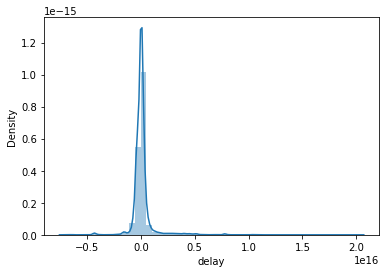

In [23]:
sns.distplot(y_train)

In [24]:
y_train.describe()

count                         27998
mean      1 days 02:07:08.430602185
std      11 days 15:12:13.171004924
min              -83 days +00:00:00
25%               -3 days +00:00:00
50%                 0 days 00:00:00
75%                 2 days 00:00:00
max               235 days 00:00:00
Name: delay, dtype: object

In [25]:
y_train.mean(),y_train.median(),y_train.mode()

(Timedelta('1 days 02:07:08.430602185'),
 Timedelta('0 days 00:00:00'),
 0   0 days
 dtype: timedelta64[ns])

### from this distribution graph we can assume that it is symmetric distribution but for symmetric grap mean ,mode and median must be same ,here median and mode are same but mean is one .so ,considered as slightly right skewed (positively skewed).
### mode is zero so many have paid on time

{'whiskers': [<matplotlib.lines.Line2D at 0x164b22feca0>,
 'caps': [<matplotlib.lines.Line2D at 0x164b2310400>,
 'boxes': [<matplotlib.lines.Line2D at 0x164b22fe910>],
 'medians': [<matplotlib.lines.Line2D at 0x164b2310b20>],
 'fliers': [<matplotlib.lines.Line2D at 0x164b2310eb0>],
 'means': []}

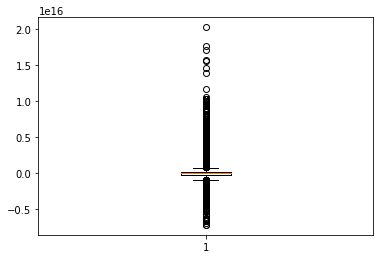

In [26]:
plt.boxplot(y_train)

### from boxplot we can analysis that there is outliers and the Q1 and Q3 are more close (25th percentile and 75% percentile),so there is only small difference in delay between different customers 

In [27]:
upper=y_train.mean()+3 *y_train.std()
lower =y_train.mean()-3*y_train.std()
upper,lower

(Timedelta('35 days 23:43:47.943616957'),
 Timedelta('-34 days +04:30:28.917587413'))

In [28]:
y_train.value_counts()

0 days      6071
1 days      3339
2 days      2728
-5 days     2074
-4 days     1897
            ... 
170 days       1
96 days        1
182 days       1
-37 days       1
114 days       1
Name: delay, Length: 177, dtype: int64

##### 6071 have paid on time (many have paid on time ) and some have paid before 5,4 days and some have paid after 122,170 days (more delay)

### maximum outliers are 36 days that is some have paid 36 days after due date 
### minimum outlies are -34 days that is some have paid 34 days before the due date

<AxesSubplot:xlabel='clear_date', ylabel='due_in_date'>

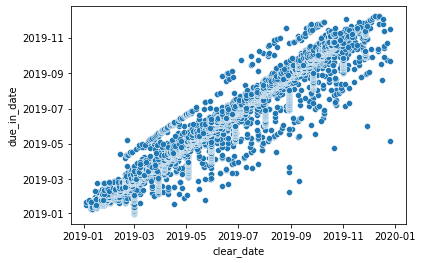

In [29]:
x=x_train['clear_date']
y=x_train['due_in_date']
sns.scatterplot(x,y)

##### clear_date and due_date is little linear which shows many have have paid ontime and some before and some after due_in_date

<AxesSubplot:xlabel='document_create_date.1', ylabel='due_in_date'>

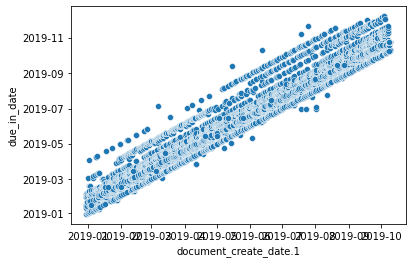

In [30]:
x=x_train['document_create_date.1']
y=x_train['due_in_date']
sns.scatterplot(x,y)

####  this is thick linear graph ,from this we can analysis that due_in_date and document create date was same or there was small difference between them

### Removing clear date after using for analysis purpose .

In [31]:
x_train.drop('clear_date',axis=1,inplace=True)

In [32]:
x_val.drop('clear_date',axis=1,inplace=True)

In [33]:
x_test.drop('clear_date',axis=1,inplace=True)

# feature engineering

In [34]:
x_train.dtypes,y_train.dtypes

(business_code                     object
 cust_number                       object
 buisness_year                    float64
 doc_id                           float64
 document_create_date.1    datetime64[ns]
 due_in_date               datetime64[ns]
 invoice_currency                  object
 total_open_amount                float64
 baseline_create_date      datetime64[ns]
 cust_payment_terms                object
 invoice_id                       float64
 dtype: object,
 dtype('<m8[ns]'))

#### converting all object and datetime into int to make feature selection and label encoding also is done for catogorical values 

In [35]:
from sklearn.preprocessing import LabelEncoder
business_code_enc =  LabelEncoder()
business_code_enc.fit(x_train['business_code'])
x_train['business_code']=business_code_enc.transform(x_train['business_code'])


In [36]:
business_code_enc =  LabelEncoder()
business_code_enc.fit(x_val['business_code'])
x_val['business_code']=business_code_enc.transform(x_val['business_code'])
x_val.head()

,business_code,cust_number,buisness_year,doc_id,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
837,1,0200126819,2019.0,1.929984e+09,2019-10-09,2019-10-24,USD,38827.38,2019-10-09,NAA8,1.929984e+09
21536,1,0200718130,2019.0,1.929995e+09,2019-10-09,2019-10-24,USD,9134.89,2019-10-09,NAA8,1.929995e+09
31842,1,0200761734,2019.0,1.929984e+09,2019-10-09,2019-10-24,USD,101392.07,2019-10-09,NAA8,1.929984e+09
35317,1,0200761734,2019.0,1.929996e+09,2019-10-09,2019-10-24,USD,12442.02,2019-10-09,NAA8,1.929996e+09
3428,1,0200793513,2019.0,1.929990e+09,2019-10-09,2019-10-24,USD,45648.25,2019-10-09,NAA8,1.929990e+09


In [37]:
business_code_enc =  LabelEncoder()
business_code_enc.fit(x_test['business_code'])
x_test['business_code']=business_code_enc.transform(x_test['business_code'])
x_test.head()

,business_code,cust_number,buisness_year,doc_id,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
13530,1,0200148860,2020.0,1.930411e+09,2020-01-17,2020-02-01,USD,7054.08,2020-01-17,NAA8,1.930411e+09
48972,1,0200148860,2020.0,1.930402e+09,2020-01-17,2020-02-01,USD,16691.52,2020-01-17,NAA8,1.930402e+09
23768,1,0100036039,2020.0,1.930407e+09,2020-01-17,2020-02-01,USD,48809.05,2020-01-17,NAA8,1.930407e+09
24186,1,0200900909,2020.0,1.930412e+09,2020-01-17,2020-02-01,USD,42783.43,2020-01-17,NAA8,1.930412e+09
41839,1,0200257211,2020.0,1.930372e+09,2020-01-17,2020-02-01,USD,46593.10,2020-01-17,NAA8,1.930372e+09


In [38]:
business_code_enc.classes_

array(['CA02', 'U001', 'U002', 'U013'], dtype=object)

In [39]:
cust_number_enc =  LabelEncoder()
cust_number_enc.fit(x_train['cust_number'])
x_train['cust_number']=cust_number_enc.transform(x_train['cust_number'])




cust_number_enc =  LabelEncoder()
cust_number_enc.fit(x_val['cust_number'])
x_val['cust_number']=cust_number_enc.transform(x_val['cust_number'])




cust_number_enc =  LabelEncoder()
cust_number_enc.fit(x_test['cust_number'])
x_test['cust_number']=cust_number_enc.transform(x_test['cust_number'])

x_train.head()



,business_code,cust_number,buisness_year,doc_id,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
20214,1,1214,2019.0,1.928534e+09,2018-12-30,2018-12-30,USD,8009.88,2018-12-30,NAX2,1.928534e+09
25411,1,788,2019.0,1.928543e+09,2018-12-30,2019-01-14,USD,35599.61,2018-12-30,NAA8,1.928543e+09
1734,1,720,2019.0,1.928537e+09,2018-12-30,2019-01-14,USD,41028.91,2018-12-30,NAH4,1.928537e+09
3130,1,584,2019.0,1.928534e+09,2018-12-30,2019-01-14,USD,114737.60,2018-12-30,NAA8,1.928534e+09
3166,1,720,2019.0,1.928540e+09,2018-12-30,2019-01-14,USD,15895.72,2018-12-30,NAH4,1.928540e+09


In [40]:
invoice_currency_enc=LabelEncoder()
invoice_currency_enc.fit(x_train['invoice_currency'])
x_train['invoice_currency'] = invoice_currency_enc.transform(x_train['invoice_currency'])




invoice_currency_enc=LabelEncoder()
invoice_currency_enc.fit(x_val['invoice_currency'])
x_val['invoice_currency'] = invoice_currency_enc.transform(x_val['invoice_currency'])




invoice_currency_enc=LabelEncoder()
invoice_currency_enc.fit(x_test['invoice_currency'])
x_test['invoice_currency'] = invoice_currency_enc.transform(x_test['invoice_currency'])
x_train.head()


,business_code,cust_number,buisness_year,doc_id,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
20214,1,1214,2019.0,1.928534e+09,2018-12-30,2018-12-30,1,8009.88,2018-12-30,NAX2,1.928534e+09
25411,1,788,2019.0,1.928543e+09,2018-12-30,2019-01-14,1,35599.61,2018-12-30,NAA8,1.928543e+09
1734,1,720,2019.0,1.928537e+09,2018-12-30,2019-01-14,1,41028.91,2018-12-30,NAH4,1.928537e+09
3130,1,584,2019.0,1.928534e+09,2018-12-30,2019-01-14,1,114737.60,2018-12-30,NAA8,1.928534e+09
3166,1,720,2019.0,1.928540e+09,2018-12-30,2019-01-14,1,15895.72,2018-12-30,NAH4,1.928540e+09


### converting target to int

In [41]:
y_train= y_train.astype(str)
y_train = y_train.str.replace('days',"").astype(int)


y_val= y_val.astype(str)
y_val = y_val.str.replace('days',"").astype(int)


y_test= y_test.astype(str)
y_test = y_test.str.replace('days',"").astype(int)


y_val

837     -1
21536   -1
31842   -1
35317   -1
3428     0
        ..
13669    3
20283    3
23140    3
27823    3
45319    3
Name: delay, Length: 8400, dtype: int32

In [42]:
x_train.dtypes

business_code                      int32
cust_number                        int32
buisness_year                    float64
doc_id                           float64
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                   int32
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
invoice_id                       float64
dtype: object

In [43]:
x_train.head()

,business_code,cust_number,buisness_year,doc_id,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
20214,1,1214,2019.0,1.928534e+09,2018-12-30,2018-12-30,1,8009.88,2018-12-30,NAX2,1.928534e+09
25411,1,788,2019.0,1.928543e+09,2018-12-30,2019-01-14,1,35599.61,2018-12-30,NAA8,1.928543e+09
1734,1,720,2019.0,1.928537e+09,2018-12-30,2019-01-14,1,41028.91,2018-12-30,NAH4,1.928537e+09
3130,1,584,2019.0,1.928534e+09,2018-12-30,2019-01-14,1,114737.60,2018-12-30,NAA8,1.928534e+09
3166,1,720,2019.0,1.928540e+09,2018-12-30,2019-01-14,1,15895.72,2018-12-30,NAH4,1.928540e+09


In [44]:
x_train.shape

(27998, 11)

<AxesSubplot:xlabel='baseline_create_date', ylabel='document_create_date.1'>

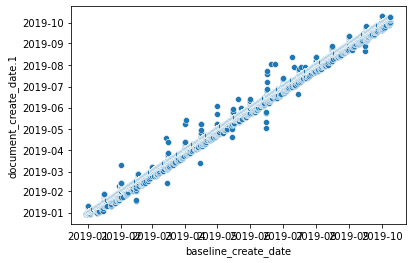

In [45]:
x=x_train['baseline_create_date']
y=x_train['document_create_date.1']
sns.scatterplot(x, y)

### this is linear which shows that there is more correlation between basile_creat_date and document_create date.so one can be droped 

In [46]:
x_train.drop('baseline_create_date',axis=1,inplace=True)

In [47]:
x_val.drop('baseline_create_date',axis=1,inplace=True)

In [48]:
x_test.drop('baseline_create_date',axis=1,inplace=True)

In [49]:
x_train['month_due_in_date '] = x_train['due_in_date'].dt.month
x_train['day_due_in_date '] = x_train['due_in_date'].dt.day
x_train['year_due_in_date'] = x_train['due_in_date'].dt.year



x_val['month_due_in_date '] = x_val['due_in_date'].dt.month
x_val['day_due_in_date '] = x_val['due_in_date'].dt.day
x_val['year_due_in_date' ] = x_val['due_in_date'].dt.year





x_test['month_due_in_date '] = x_test['due_in_date'].dt.month
x_test['day_due_in_date '] = x_test['due_in_date'].dt.day
x_test['year_due_in_date '] = x_test['due_in_date'].dt.year

In [50]:
x_train['month_document_create_date.1 '] = x_train['document_create_date.1'].dt.month
x_train['day_document_create_date.1 '] = x_train['document_create_date.1'].dt.day
x_train['year_document_create_date.1'] = x_train['document_create_date.1'].dt.year



x_val['month_document_create_date.1 '] = x_val['document_create_date.1'].dt.month
x_val['day_document_create_date.1'] = x_val['document_create_date.1'].dt.day
x_val['year_document_create_date.1' ] = x_val['document_create_date.1'].dt.year





x_test['month_document_create_date.1'] = x_test['document_create_date.1'].dt.month
x_test['day_document_create_date.1'] = x_test['document_create_date.1'].dt.day
x_test['year_document_create_date.1'] = x_test['document_create_date.1'].dt.year

In [51]:
x_train.drop(['document_create_date.1','due_in_date'],axis=1,inplace=True)

In [52]:
x_val.drop(['document_create_date.1','due_in_date'],axis=1,inplace=True)

In [53]:
x_test.drop(['document_create_date.1','due_in_date'],axis=1,inplace=True)

In [54]:
x_train.cust_payment_terms.value_counts()

NAA8    11437
NAH4     7088
CA10     2176
NAC6      934
NAM4      761
        ...  
NAUP        1
NAD8        1
B112        1
NAUI        1
NATH        1
Name: cust_payment_terms, Length: 64, dtype: int64

In [55]:
cust_payment_enc=LabelEncoder()
cust_payment_enc.fit(x_train['cust_payment_terms'])
x_train['cust_payment_terms']=cust_payment_enc.transform(x_train['cust_payment_terms'])



cust_payment_enc=LabelEncoder()
cust_payment_enc.fit(x_val['cust_payment_terms'])
x_val['cust_payment_terms']=cust_payment_enc.transform(x_val['cust_payment_terms'])




cust_payment_enc=LabelEncoder()
cust_payment_enc.fit(x_test['cust_payment_terms'])
x_test['cust_payment_terms']=cust_payment_enc.transform(x_test['cust_payment_terms'])



### checking if all the datatypes are of int and float type

In [56]:
x_train.dtypes

business_code                      int32
cust_number                        int32
buisness_year                    float64
doc_id                           float64
invoice_currency                   int32
total_open_amount                float64
cust_payment_terms                 int32
invoice_id                       float64
month_due_in_date                  int64
day_due_in_date                    int64
year_due_in_date                   int64
month_document_create_date.1       int64
day_document_create_date.1         int64
year_document_create_date.1        int64
dtype: object

In [57]:
x_val.dtypes

business_code                      int32
cust_number                        int32
buisness_year                    float64
doc_id                           float64
invoice_currency                   int32
total_open_amount                float64
cust_payment_terms                 int32
invoice_id                       float64
month_due_in_date                  int64
day_due_in_date                    int64
year_due_in_date                   int64
month_document_create_date.1       int64
day_document_create_date.1         int64
year_document_create_date.1        int64
dtype: object

In [58]:
x_test.dtypes

business_code                     int32
cust_number                       int32
buisness_year                   float64
doc_id                          float64
invoice_currency                  int32
total_open_amount               float64
cust_payment_terms                int32
invoice_id                      float64
month_due_in_date                 int64
day_due_in_date                   int64
year_due_in_date                  int64
month_document_create_date.1      int64
day_document_create_date.1        int64
year_document_create_date.1       int64
dtype: object

In [59]:
x_train.shape

(27998, 14)

In [60]:
x_val.shape

(8400, 14)

In [61]:
x_test.shape

(3600, 14)

## Feature selection

### heat map

<AxesSubplot:>

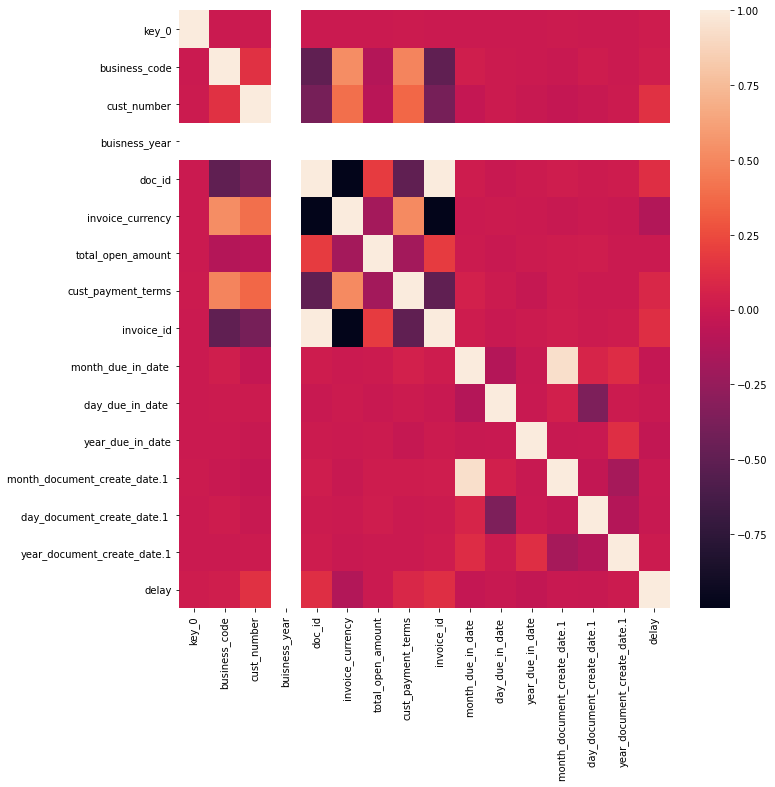

In [62]:
corrmat = x_train.merge(y_train , on = x_train.index ).corr()
fig,ax=plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat)

<AxesSubplot:title={'center':'heatmap'}>

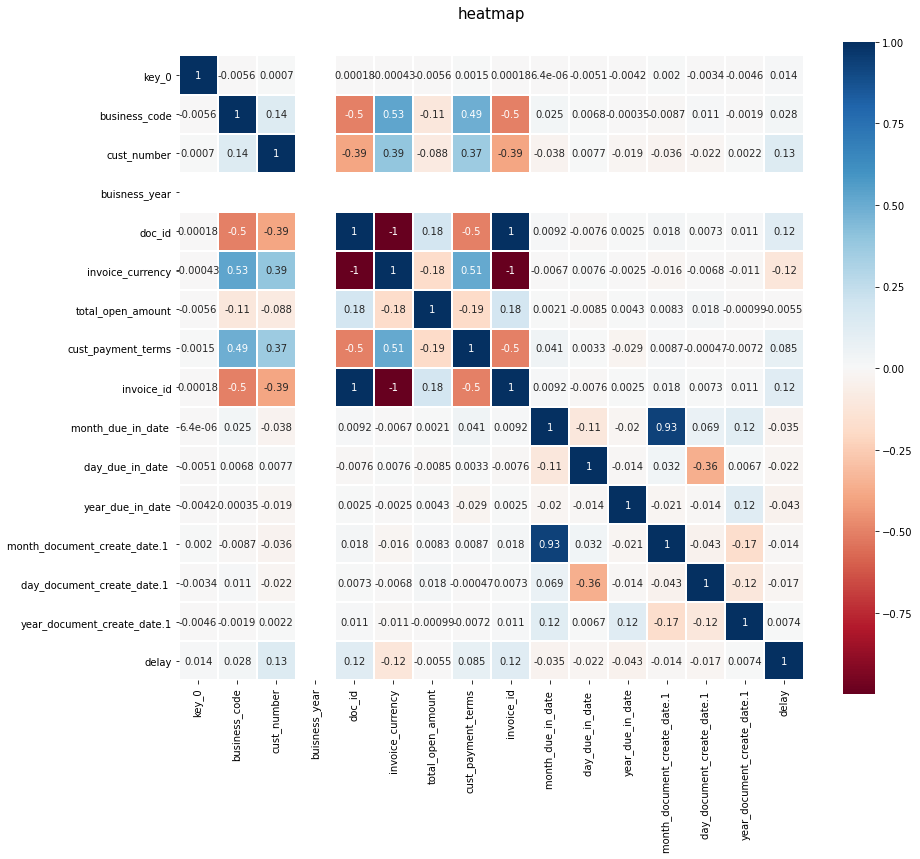

In [63]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('heatmap', y=1.05, size=15)
sns.heatmap(x_train.merge(y_train , on = x_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

### from the heat map we can understand that business year and year_clear_date has zero correlation and it is constant so drop it 

In [64]:
x_test.dtypes

business_code                     int32
cust_number                       int32
buisness_year                   float64
doc_id                          float64
invoice_currency                  int32
total_open_amount               float64
cust_payment_terms                int32
invoice_id                      float64
month_due_in_date                 int64
day_due_in_date                   int64
year_due_in_date                  int64
month_document_create_date.1      int64
day_document_create_date.1        int64
year_document_create_date.1       int64
dtype: object

In [65]:
x_train.drop(['buisness_year'],axis=1,inplace=True)

In [66]:
x_val.drop(['buisness_year'],axis=1,inplace=True)

In [67]:
x_test.drop(['buisness_year'],axis=1,inplace=True)

In [68]:
x_test.dtypes

business_code                     int32
cust_number                       int32
doc_id                          float64
invoice_currency                  int32
total_open_amount               float64
cust_payment_terms                int32
invoice_id                      float64
month_due_in_date                 int64
day_due_in_date                   int64
year_due_in_date                  int64
month_document_create_date.1      int64
day_document_create_date.1        int64
year_document_create_date.1       int64
dtype: object

In [69]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0)
sel.fit(x_train)
sum(sel.get_support()),x_train.shape

(13, (27998, 13))

##### all columns variance meets the threshold and they are having good correlation with the delay

In [70]:
x_train.cov()

,business_code,cust_number,doc_id,invoice_currency,total_open_amount,cust_payment_terms,invoice_id,month_due_in_date,day_due_in_date,year_due_in_date,month_document_create_date.1,day_document_create_date.1,year_document_create_date.1
business_code,2.974200e-01,1.738565e+01,-7.673626e+07,7.757460e-02,-2.566717e+03,2.977916e+00,-7.673626e+07,3.729693e-02,3.223831e-02,-0.000002,-1.272897e-02,5.425108e-02,-0.000070
cust_number,1.738565e+01,5.541325e+04,-2.585003e+10,2.499787e+01,-8.681713e+05,9.616025e+02,-2.585003e+10,-2.436587e+01,1.576130e+01,-0.038415,-2.273348e+01,-4.596906e+01,0.036238
doc_id,-7.673626e+07,-2.585003e+10,7.785366e+16,-7.551415e+07,2.115189e+12,-1.563515e+09,7.785366e+16,6.902311e+06,-1.842444e+07,5996.030755,1.311038e+07,1.806482e+07,209170.503240
invoice_currency,7.757460e-02,2.499787e+01,-7.551415e+07,7.336733e-02,-2.056921e+03,1.536228e+00,-7.551415e+07,-4.908688e-03,1.799707e-02,-0.000006,-1.167359e-02,-1.635906e-02,-0.000197
total_open_amount,-2.566717e+03,-8.681713e+05,2.115189e+12,-2.056921e+03,1.759982e+09,-9.043899e+04,2.115189e+12,2.417359e+02,-3.114412e+03,1.519982,9.359182e+02,6.791189e+03,-2.845235
cust_payment_terms,2.977916e+00,9.616025e+02,-1.563515e+09,1.536228e+00,-9.043899e+04,1.243281e+02,-1.563515e+09,1.236449e+00,3.227205e-01,-0.002741,2.592941e-01,-4.625948e-02,-0.005527
invoice_id,-7.673626e+07,-2.585003e+10,7.785366e+16,-7.551415e+07,2.115189e+12,-1.563515e+09,7.785366e+16,6.902311e+06,-1.842444e+07,5996.030755,1.311038e+07,1.806482e+07,209170.503240
month_due_in_date,3.729693e-02,-2.436587e+01,6.902311e+06,-4.908688e-03,2.417359e+02,1.236449e+00,6.902311e+06,7.233436e+00,-2.624520e+00,-0.000448,6.704245e+00,1.630694e+00,0.021423
day_due_in_date,3.223831e-02,1.576130e+01,-1.842444e+07,1.799707e-02,-3.114412e+03,3.227205e-01,-1.842444e+07,-2.624520e+00,7.549006e+01,-0.001056,7.495885e-01,-2.786855e+01,0.003985
year_due_in_date,-1.604878e-06,-3.841453e-02,5.996031e+03,-5.694894e-06,1.519982e+00,-2.740956e-03,5.996031e+03,-4.476743e-04,-1.056089e-03,0.000071,-4.848774e-04,-1.055829e-03,0.000071


##### measuring the joint variability between the columns

## measuring the correlation aslo as all values are int

In [71]:
y=x_train.corr()
y

,business_code,cust_number,doc_id,invoice_currency,total_open_amount,cust_payment_terms,invoice_id,month_due_in_date,day_due_in_date,year_due_in_date,month_document_create_date.1,day_document_create_date.1,year_document_create_date.1
business_code,1.000000,0.135425,-0.504285,0.525150,-0.112186,0.489714,-0.504285,0.025428,0.006804,-0.000348,-0.008729,0.011270,-0.001879
cust_number,0.135425,1.000000,-0.393563,0.392053,-0.087911,0.366357,-0.393563,-0.038486,0.007706,-0.019308,-0.036117,-0.022124,0.002247
doc_id,-0.504285,-0.393563,1.000000,-0.999166,0.180699,-0.502548,1.000000,0.009198,-0.007600,0.002543,0.017572,0.007335,0.010943
invoice_currency,0.525150,0.392053,-0.999166,1.000000,-0.181014,0.508651,-0.999166,-0.006738,0.007647,-0.002488,-0.016118,-0.006843,-0.010632
total_open_amount,-0.112186,-0.087911,0.180699,-0.181014,1.000000,-0.193338,0.180699,0.002142,-0.008544,0.004287,0.008343,0.018340,-0.000990
cust_payment_terms,0.489714,0.366357,-0.502548,0.508651,-0.193338,1.000000,-0.502548,0.041231,0.003331,-0.029085,0.008697,-0.000470,-0.007236
invoice_id,-0.504285,-0.393563,1.000000,-0.999166,0.180699,-0.502548,1.000000,0.009198,-0.007600,0.002543,0.017572,0.007335,0.010943
month_due_in_date,0.025428,-0.038486,0.009198,-0.006738,0.002142,0.041231,0.009198,1.000000,-0.112314,-0.019695,0.932238,0.068692,0.116281
day_due_in_date,0.006804,0.007706,-0.007600,0.007647,-0.008544,0.003331,-0.007600,-0.112314,1.000000,-0.014382,0.032265,-0.363395,0.006695
year_due_in_date,-0.000348,-0.019308,0.002543,-0.002488,0.004287,-0.029085,0.002543,-0.019695,-0.014382,1.000000,-0.021455,-0.014153,0.122805


<AxesSubplot:ylabel='Density'>

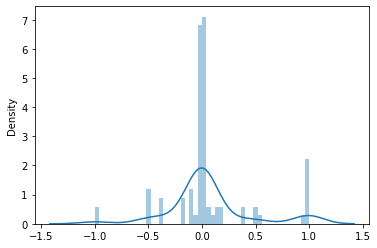

In [72]:
sns.distplot(y)

#### distributin graph for correlation between all columns

<AxesSubplot:xlabel='delay', ylabel='total_open_amount'>

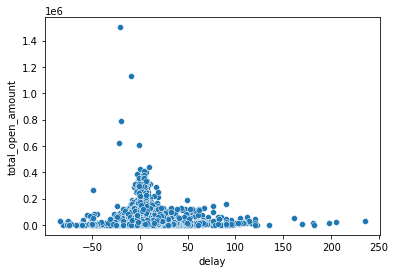

In [73]:
x=y_train
y=x_train['total_open_amount']
sns.scatterplot(x,y)

#### less total amount has more delay

## modeling

## Tree based model

In [74]:
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0 , max_depth=10)
regressor.fit(x_train, y_train)


DecisionTreeRegressor(max_depth=10, random_state=0)

In [75]:
y_predict = regressor.predict(x_val)

In [76]:
mean_squared_error(y_val, y_predict, squared=False)

19.170065720631644

In [77]:
y_predict_test = regressor.predict(x_test)
mean_squared_error(y_test, y_predict_test, squared=False)

16.958439609779383

In [78]:
y=regressor.score(x_train,y_train)
accuarcy=y*100
accuarcy

64.38460997108868

### Randomforest Regressor

In [79]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor(random_state=0,max_depth=10)

reg.fit(x_train,y_train)


RandomForestRegressor(max_depth=10, random_state=0)

In [80]:
predict2=reg.predict(x_val)
mean_squared_error(y_val,predict2,squared=False)

10.116563169992249

In [81]:
y_predict_test = reg.predict(x_test)
mean_squared_error(y_test, y_predict_test, squared=False)

13.897575538654435

In [82]:
a=reg.score(x_train,y_train)
accuarcy = a*100
accuarcy

64.51082345975287

#### Random forest classifier

In [83]:
from sklearn.ensemble import RandomForestClassifier
base_model=RandomForestClassifier(max_depth=10)
base_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=10)

In [84]:
predicted3=base_model.predict(x_val)
mean_squared_error(y_val,predicted3,squared=False)

7.532959324891924

In [85]:
y_predict_test = base_model.predict(x_test)
mean_squared_error(y_test, y_predict_test, squared=False)

10.921131402520121

In [86]:
a=base_model.score(x_train,y_train)
accuarcy = a*100
accuarcy

43.86741910136438

### Tree based model and Random forest Regressor gives best accuracy

### Random forest Regressor has better means square error and the accuaracy is better than other model

# TEST (preprocessing and feature engineering on main_test)

In [87]:
x_train.columns

Index(['business_code', 'cust_number', 'doc_id', 'invoice_currency',
       'total_open_amount', 'cust_payment_terms', 'invoice_id',
       'month_due_in_date ', 'day_due_in_date ', 'year_due_in_date',
       'month_document_create_date.1 ', 'day_document_create_date.1 ',
       'year_document_create_date.1'],
      dtype='object')

In [88]:
main_test

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
1,U001,0200759878,SA,NaN,2020.0,1.930675e+09,2020-03-21,20200320,20200321,20200405.0,USD,RV,1.0,NaN,14307.82,20200321.0,NAH4,1.930675e+09,1
4,U001,0200230690,DECA,NaN,2020.0,1.930670e+09,2020-03-19,20200319,20200319,20200408.0,USD,RV,1.0,NaN,107.76,20200316.0,NAM4,1.930670e+09,1
7,U001,0200078795,H T H foundation,NaN,2020.0,1.930839e+09,2020-04-29,20200429,20200429,20200514.0,USD,RV,1.0,NaN,697.97,20200429.0,NAA8,1.930839e+09,1
13,U001,0200794332,COST associates,NaN,2020.0,1.930731e+09,2020-04-01,20200401,20200401,20200416.0,USD,RV,1.0,NaN,32715.47,20200401.0,NAAX,1.930731e+09,1
15,U001,0200769623,WAL-MAR us,NaN,2020.0,1.930798e+09,2020-04-17,20200417,20200417,20200502.0,USD,RV,1.0,NaN,2217.08,20200417.0,NAH4,1.930798e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49982,U001,0200744019,TARG in,NaN,2020.0,1.930671e+09,2020-03-20,20200319,20200320,20200404.0,USD,RV,1.0,NaN,5356.20,20200320.0,NAA8,1.930671e+09,1
49990,U001,0200704858,WAKE corp,NaN,2020.0,1.930720e+09,2020-03-31,20200330,20200331,20200415.0,USD,RV,1.0,NaN,9207.28,20200331.0,NAA8,1.930720e+09,1
49997,U001,0200769623,WAL-MAR us,NaN,2020.0,1.930624e+09,2020-03-10,20200309,20200310,20200325.0,USD,RV,1.0,NaN,36401.25,20200310.0,NAH4,1.930624e+09,1
49998,U001,0100031704,DELHAIZE co,NaN,2020.0,1.930797e+09,2020-04-18,20200417,20200418,20200622.0,USD,RV,1.0,NaN,8839.40,20200418.0,NAGD,1.930797e+09,1


In [89]:
x_main_test = main_test.drop(['clear_date'],axis=1)
x_main_test


main_test.drop(['clear_date'], inplace =True,axis=1)

#### drop name_customer,buisness_year,document_create_date,document type,posting_id,area_business,isOpen

In [90]:
x_main_test.drop(['name_customer','buisness_year','document_create_date','document type','posting_id','area_business','isOpen'],axis=1,inplace=True)

In [91]:
x_main_test.drop('baseline_create_date',axis=1,inplace=True)

In [92]:
x_main_test=x_main_test[x_main_test.invoice_id.isnull()==False]

In [93]:
x_main_test['due_in_date'] = pd.to_datetime(x_main_test['due_in_date'],format="%Y%m%d")
x_main_test['document_create_date.1']=pd.to_datetime(x_main_test['document_create_date.1'],format='%Y%m%d')



In [94]:
x_main_test.drop('posting_date',axis=1,inplace=True)

In [95]:
x_main_test.head()

,business_code,cust_number,doc_id,document_create_date.1,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,invoice_id
1,U001,0200759878,1.930675e+09,2020-03-21,2020-04-05,USD,14307.82,NAH4,1.930675e+09
4,U001,0200230690,1.930670e+09,2020-03-19,2020-04-08,USD,107.76,NAM4,1.930670e+09
7,U001,0200078795,1.930839e+09,2020-04-29,2020-05-14,USD,697.97,NAA8,1.930839e+09
13,U001,0200794332,1.930731e+09,2020-04-01,2020-04-16,USD,32715.47,NAAX,1.930731e+09
15,U001,0200769623,1.930798e+09,2020-04-17,2020-05-02,USD,2217.08,NAH4,1.930798e+09


In [96]:
x_main_test.sort_values(['document_create_date.1','due_in_date'],inplace=True)
x_main_test.head()

,business_code,cust_number,doc_id,document_create_date.1,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,invoice_id
17125,U001,CCU013,1.930570e+09,2020-02-27,2020-02-27,USD,45158.67,NAX2,1.930570e+09
35450,U001,CCU013,1.930558e+09,2020-02-27,2020-02-27,USD,26226.85,NAX2,1.930558e+09
21778,CA02,0140106181,2.960617e+09,2020-02-27,2020-03-08,CAD,6886.80,CA10,2.960617e+09
732,U001,0200712187,1.930579e+09,2020-02-27,2020-03-13,USD,17430.25,NAA8,1.930579e+09
788,U001,0200750051,1.930580e+09,2020-02-27,2020-03-13,USD,122172.17,NAA8,1.930580e+09


In [97]:
business_code_enc =  LabelEncoder()
business_code_enc.fit(x_main_test['business_code'])
x_main_test['business_code']=business_code_enc.transform(x_main_test['business_code'])
x_main_test.head()

,business_code,cust_number,doc_id,document_create_date.1,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,invoice_id
17125,1,CCU013,1.930570e+09,2020-02-27,2020-02-27,USD,45158.67,NAX2,1.930570e+09
35450,1,CCU013,1.930558e+09,2020-02-27,2020-02-27,USD,26226.85,NAX2,1.930558e+09
21778,0,0140106181,2.960617e+09,2020-02-27,2020-03-08,CAD,6886.80,CA10,2.960617e+09
732,1,0200712187,1.930579e+09,2020-02-27,2020-03-13,USD,17430.25,NAA8,1.930579e+09
788,1,0200750051,1.930580e+09,2020-02-27,2020-03-13,USD,122172.17,NAA8,1.930580e+09


In [98]:
cust_number_enc =  LabelEncoder()
cust_number_enc.fit(x_main_test['cust_number'])
x_main_test['cust_number']=cust_number_enc.transform(x_main_test['cust_number'])


In [99]:
invoice_currency_enc=LabelEncoder()
invoice_currency_enc.fit(x_main_test['invoice_currency'])
x_main_test['invoice_currency'] = invoice_currency_enc.transform(x_main_test['invoice_currency'])
x_main_test.head()

,business_code,cust_number,doc_id,document_create_date.1,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,invoice_id
17125,1,674,1.930570e+09,2020-02-27,2020-02-27,1,45158.67,NAX2,1.930570e+09
35450,1,674,1.930558e+09,2020-02-27,2020-02-27,1,26226.85,NAX2,1.930558e+09
21778,0,158,2.960617e+09,2020-02-27,2020-03-08,0,6886.80,CA10,2.960617e+09
732,1,304,1.930579e+09,2020-02-27,2020-03-13,1,17430.25,NAA8,1.930579e+09
788,1,366,1.930580e+09,2020-02-27,2020-03-13,1,122172.17,NAA8,1.930580e+09


In [100]:
cust_payment_enc=LabelEncoder()
cust_payment_enc.fit(x_main_test['cust_payment_terms'])
x_main_test['cust_payment_terms']=cust_payment_enc.transform(x_main_test['cust_payment_terms'])


In [101]:
x_main_test['month_due_in_date'] = x_main_test['due_in_date'].dt.month
x_main_test['day_due_in_date'] = x_main_test['due_in_date'].dt.day
x_main_test['year_due_in_date'] = x_main_test['due_in_date'].dt.year


In [102]:
x_main_test['month_document_create_date.1'] = x_main_test['document_create_date.1'].dt.month
x_main_test['day_document_create_date.1'] = x_main_test['document_create_date.1'].dt.day
x_main_test['year_document_create_date.1'] = x_main_test['document_create_date.1'].dt.year

In [103]:
x_main_test.drop(['due_in_date','document_create_date.1'],axis=1,inplace=True)

In [104]:
x_main_test.head()

,business_code,cust_number,doc_id,invoice_currency,total_open_amount,cust_payment_terms,invoice_id,month_due_in_date,day_due_in_date,year_due_in_date,month_document_create_date.1,day_document_create_date.1,year_document_create_date.1
17125,1,674,1.930570e+09,1,45158.67,41,1.930570e+09,2,27,2020,2,27,2020
35450,1,674,1.930558e+09,1,26226.85,41,1.930558e+09,2,27,2020,2,27,2020
21778,0,158,2.960617e+09,0,6886.80,3,2.960617e+09,3,8,2020,2,27,2020
732,1,304,1.930579e+09,1,17430.25,12,1.930579e+09,3,13,2020,2,27,2020
788,1,366,1.930580e+09,1,122172.17,12,1.930580e+09,3,13,2020,2,27,2020


In [105]:
x_main_test.dtypes

business_code                     int32
cust_number                       int32
doc_id                          float64
invoice_currency                  int32
total_open_amount               float64
cust_payment_terms                int32
invoice_id                      float64
month_due_in_date                 int64
day_due_in_date                   int64
year_due_in_date                  int64
month_document_create_date.1      int64
day_document_create_date.1        int64
year_document_create_date.1       int64
dtype: object

In [106]:
x_main_test.columns,x_train.columns

(Index(['business_code', 'cust_number', 'doc_id', 'invoice_currency',
        'total_open_amount', 'cust_payment_terms', 'invoice_id',
        'month_due_in_date', 'day_due_in_date', 'year_due_in_date',
        'month_document_create_date.1', 'day_document_create_date.1',
        'year_document_create_date.1'],
       dtype='object'),
 Index(['business_code', 'cust_number', 'doc_id', 'invoice_currency',
        'total_open_amount', 'cust_payment_terms', 'invoice_id',
        'month_due_in_date ', 'day_due_in_date ', 'year_due_in_date',
        'month_document_create_date.1 ', 'day_document_create_date.1 ',
        'year_document_create_date.1'],
       dtype='object'))

## predicting test(using RandomForestRegressor)

In [107]:
final_result = reg.predict(x_main_test)

In [108]:
x_train.shape

(27998, 13)

In [109]:
final_result = pd.Series(final_result,name='delay')


In [110]:
main_test.reset_index(drop=True,inplace=True)

In [111]:
Final = main_test.merge(final_result , on = x_main_test.index )


In [112]:
Final['delay']= Final['delay'].round().astype(int)

In [113]:
Final.head()

,key_0,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
0,17125,U001,0200759878,SA,2020.0,1.930675e+09,2020-03-21,20200320,20200321,20200405.0,USD,RV,1.0,NaN,14307.82,20200321.0,NAH4,1.930675e+09,1,2
1,35450,U001,0200230690,DECA,2020.0,1.930670e+09,2020-03-19,20200319,20200319,20200408.0,USD,RV,1.0,NaN,107.76,20200316.0,NAM4,1.930670e+09,1,2
2,21778,U001,0200078795,H T H foundation,2020.0,1.930839e+09,2020-04-29,20200429,20200429,20200514.0,USD,RV,1.0,NaN,697.97,20200429.0,NAA8,1.930839e+09,1,4
3,732,U001,0200794332,COST associates,2020.0,1.930731e+09,2020-04-01,20200401,20200401,20200416.0,USD,RV,1.0,NaN,32715.47,20200401.0,NAAX,1.930731e+09,1,-6
4,788,U001,0200769623,WAL-MAR us,2020.0,1.930798e+09,2020-04-17,20200417,20200417,20200502.0,USD,RV,1.0,NaN,2217.08,20200417.0,NAH4,1.930798e+09,1,-5


### finding the payment prediction date:due_in_date+ delay


In [114]:
Final['due_in_date']= pd.to_datetime(Final['due_in_date'],format='%Y%m%d')

In [115]:
Final['payment_prediction_date'] = Final['due_in_date'] + pd.to_timedelta(Final['delay'],unit='d')

In [116]:
Final.head()

,key_0,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay,payment_prediction_date
0,17125,U001,0200759878,SA,2020.0,1.930675e+09,2020-03-21,20200320,20200321,2020-04-05,USD,RV,1.0,NaN,14307.82,20200321.0,NAH4,1.930675e+09,1,2,2020-04-07
1,35450,U001,0200230690,DECA,2020.0,1.930670e+09,2020-03-19,20200319,20200319,2020-04-08,USD,RV,1.0,NaN,107.76,20200316.0,NAM4,1.930670e+09,1,2,2020-04-10
2,21778,U001,0200078795,H T H foundation,2020.0,1.930839e+09,2020-04-29,20200429,20200429,2020-05-14,USD,RV,1.0,NaN,697.97,20200429.0,NAA8,1.930839e+09,1,4,2020-05-18
3,732,U001,0200794332,COST associates,2020.0,1.930731e+09,2020-04-01,20200401,20200401,2020-04-16,USD,RV,1.0,NaN,32715.47,20200401.0,NAAX,1.930731e+09,1,-6,2020-04-10
4,788,U001,0200769623,WAL-MAR us,2020.0,1.930798e+09,2020-04-17,20200417,20200417,2020-05-02,USD,RV,1.0,NaN,2217.08,20200417.0,NAH4,1.930798e+09,1,-5,2020-04-27


#### Finding aging bucket (if there is aging bucket then it is 1 or if the customer has paid before due date then it will be zero)

In [117]:
b=[]
for a in Final['delay']:
    
    if (a>=0):
        
        b.append(0)
    else:
        b.append(1)
    

In [118]:
Final['aging bucket'] = b

In [119]:
Final.head()

,key_0,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay,payment_prediction_date,aging bucket
0,17125,U001,0200759878,SA,2020.0,1.930675e+09,2020-03-21,20200320,20200321,2020-04-05,USD,RV,1.0,NaN,14307.82,20200321.0,NAH4,1.930675e+09,1,2,2020-04-07,0
1,35450,U001,0200230690,DECA,2020.0,1.930670e+09,2020-03-19,20200319,20200319,2020-04-08,USD,RV,1.0,NaN,107.76,20200316.0,NAM4,1.930670e+09,1,2,2020-04-10,0
2,21778,U001,0200078795,H T H foundation,2020.0,1.930839e+09,2020-04-29,20200429,20200429,2020-05-14,USD,RV,1.0,NaN,697.97,20200429.0,NAA8,1.930839e+09,1,4,2020-05-18,0
3,732,U001,0200794332,COST associates,2020.0,1.930731e+09,2020-04-01,20200401,20200401,2020-04-16,USD,RV,1.0,NaN,32715.47,20200401.0,NAAX,1.930731e+09,1,-6,2020-04-10,1
4,788,U001,0200769623,WAL-MAR us,2020.0,1.930798e+09,2020-04-17,20200417,20200417,2020-05-02,USD,RV,1.0,NaN,2217.08,20200417.0,NAH4,1.930798e+09,1,-5,2020-04-27,1


### Thank you

In [122]:
Final.to_csv('file1.csv')